In [1]:
#%matplotlib widget
%load_ext blackcellmagic

In [2]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import HTML, display

In [3]:
def circle(r, L=20):
    if r > np.floor(L / 2):
        r = L // 2
    x_min = r
    x_max = L - r

    center = (
        (random.randrange(x_min, x_max), random.randrange(x_min, x_max))
        if x_min != x_max
        else (x_min, x_min)
    )

    x = np.zeros((L, L))
    x[center] = 1
    for i in range(L):
        for j in range(L):
            if np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2) <= r:
                x[i, j] = 1
    return x

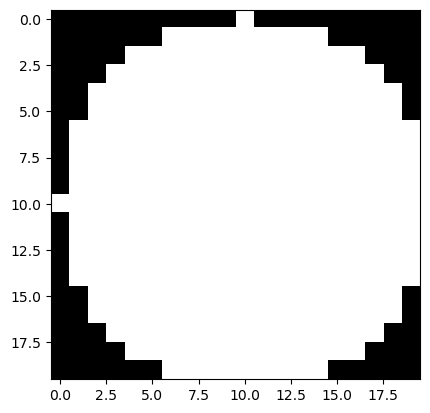

In [4]:
R = random.randrange(1,11)
plt.imshow(circle(R), cmap="gray")

In [5]:
def rect(L1, L2, L=20):
    if L1 > L:
        L1 = L
    if L2 > L:
        L2 = L
    L12 = np.floor(L1/2)
    L22 = np.floor(L2/2)
    
    v_min = L12
    v_max = L - L12
    h_min = L22
    h_max = L - L22

    v_center = (
        random.randrange(v_min, v_max)
        if v_min != v_max
        else v_min
    )
    h_center = (
        random.randrange(h_min, h_max)
        if h_min != h_max
        else h_min
    )
    center = (v_center, h_center)
    r_v_min = center[0] - L12
    r_v_max = center[0] + L12
    r_h_min = center[1] - L22
    r_h_max = center[1] + L22
    
    x = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            if r_v_min <= i <= r_v_max:
                if r_h_min <= j <= r_h_max:
                    x[i, j] = 1
    return x

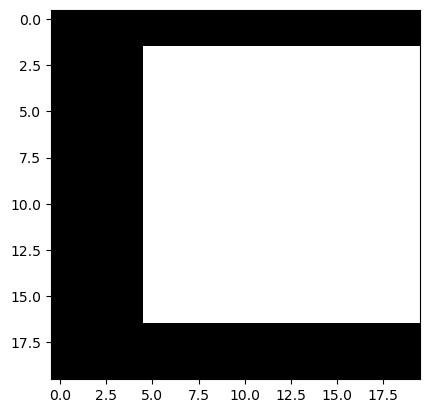

In [6]:
L = random.randrange(1, 20)
plt.imshow(rect(L, L), cmap="gray")

In [7]:
L = 20
L2 = L**2
N = 500
circles = np.zeros((N, L2))
rects = np.zeros((N, L2))

for i in range(N):
    R = random.randrange(1, L//2)
    circles[i, :] = circle(R, L).reshape(-1)

for i in range(N):
    L1 = random.randrange(1, L//2)
    rects[i, :] = rect(L1, L1).reshape(-1)

X = np.vstack((circles, rects))
d = np.vstack((-1*np.ones((N, 1)), np.ones((N,1))))

Nt = N*2
indexes = list(range(Nt))
random.shuffle(indexes)

X = X[indexes, :]
d = d[indexes, :]

[-1.]


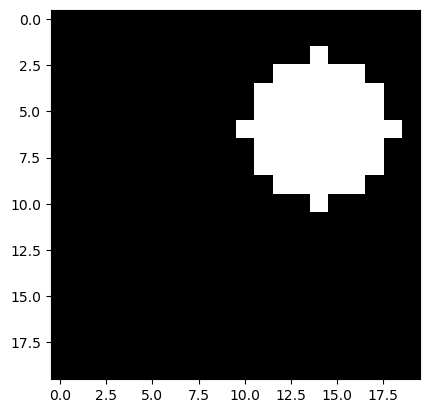

In [8]:
i = 10
plt.imshow(X[i,:].reshape(L,L), cmap="gray")
print(d[i,:])

In [9]:
data = np.hstack((X, d))

df = pd.DataFrame(data)
df.to_csv("circles_and_squares.csv", index=+False)

In [10]:
pd.read_csv('circles_and_squares.csv')

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
